In [1]:
import numpy as np 
import matplotlib.pyplot as plt

### Utilizando o método de Monte Carlo para estimar o valor de $\pi$ gerando pontos aleatórios dentro de um quadrado e verificando quantos caem dentro de um círculo inscrito.
### Considere um círculo de raio $𝑟=1$ inscrito em um quadrado de lado $2𝑟=2$, com area do circulo sendo $\pi r^2= \pi $, area do quadrado é $4$ e a razão entre as areas é $\frac{\pi}{4}$.
### Se gerarmos $N$ pontos aleatórios distribuídos uniformemente dentro do quadrado, a fração de pontos que caem dentro do círculo se aproxima de $\frac{\pi}{4}$, assim podemos estimar $\pi$ como $ \pi \approx 4 \times \frac{\text{numeros de pontos no circulo}}{\text{numero de pontos totais}} $

In [21]:
rng = np.random.default_rng() 

def monte_carlo_pi(numero_pontos):
    """
    Estima o valor de π usando o método de Monte Carlo.

    O método gera pontos aleatórios dentro do quadrado unitário [0,1] × [0,1] e conta quantos 
    desses pontos caem dentro do quarto de círculo de raio 1. A proporção de pontos dentro 
    do círculo é usada para estimar π.

    Parâmetros:
    numero_pontos :
        O número de pontos aleatórios a serem gerados para a estimativa.
    Retorna:
        A estimativa do valor de π baseada nos pontos gerados.
    """
    dentro_circulo = 0
    for _ in range(numero_pontos):
        x = np.random.uniform(0, 1)
        y = np.random.uniform(0, 1)
        if x**2 + y**2 <= 1:
            dentro_circulo += 1
    return 4 * dentro_circulo / numero_pontos

numero_pontos = 100000
pi = monte_carlo_pi(numero_pontos)
erro = (pi - np.pi) / np.pi

print("Valor estimado de π:", pi)
print("Valor real de π:", np.pi)
print("Erro relativo:", erro)

Valor estimado de π: 3.1398
Valor real de π: 3.141592653589793
Erro relativo: -0.000570619360133964


In [12]:
%timeit monte_carlo_pi

24.2 ns ± 0.0547 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


### Agora sendo feita uma lista com os valores dentro e fora do circulo e plotando um gráfico mostrando os pontos e dentros e foras do circulo.

3.1292


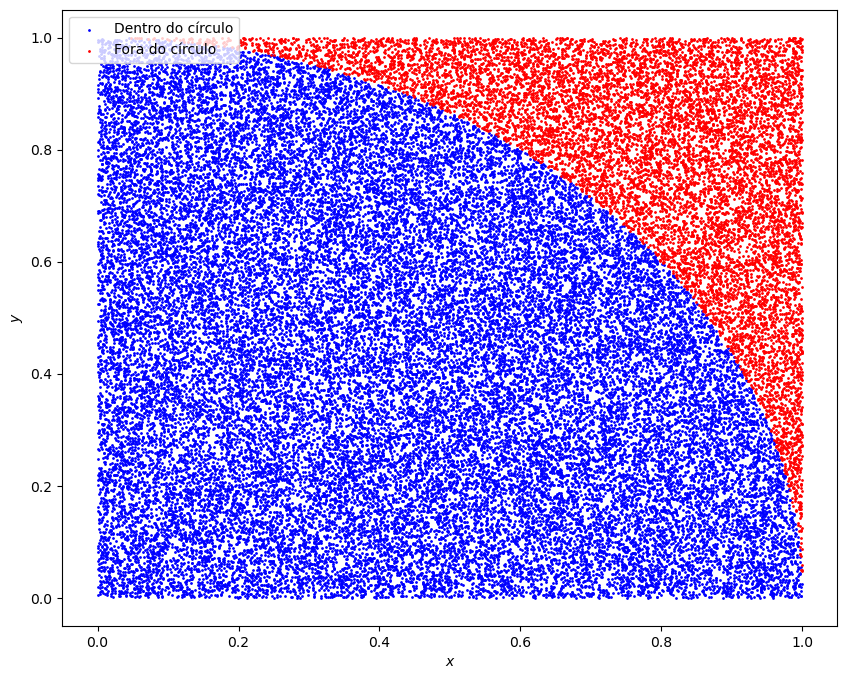

In [ ]:
def monte_carlo_pi(numero_pontos: int, retorna_pontos: bool = False):
    """
    Estima o valor de π usando o método de Monte Carlo e, opcionalmente, retorna os pontos sorteados.

    Parâmetros:
    numero_pontos (int): Número de pontos aleatórios a serem gerados.
    retorna_pontos (bool): Se True, retorna listas dos pontos dentro e fora do círculo.

    Retorna:
    float: Estimativa do valor de π.
    (Opcional) Tuple[List[Tuple[float, float]], List[Tuple[float, float]]]: 
              Listas de pontos dentro e fora do círculo.
    """
    rng = np.random.default_rng()
    x = rng.uniform(0, 1, numero_pontos)
    y = rng.uniform(0, 1, numero_pontos)
    dentro = x**2 + y**2 <= 1
    pi_estimado = 4 * np.sum(dentro) / numero_pontos

    if retorna_pontos:
        pontos_dentro = [(x[i], y[i]) for i in range(numero_pontos) if dentro[i]]
        pontos_fora = [(x[i], y[i]) for i in range(numero_pontos) if not dentro[i]]
        return pi_estimado, pontos_dentro, pontos_fora
    
    return pi_estimado


numero_pontos = 50000
pi_estimado, pontos_dentro, pontos_fora = monte_carlo_pi(numero_pontos, retorna_pontos=True)


x_dentro, y_dentro = zip(*pontos_dentro)
x_fora, y_fora = zip(*pontos_fora)

print(pi_estimado)


plt.figure(figsize=(10, 8))
plt.scatter(x_dentro, y_dentro, color='blue', s=1, label="Dentro do círculo")
plt.scatter(x_fora, y_fora, color='red', s=1, label="Fora do círculo")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

In [22]:
def mapa_logistico(r, x0, N):
    # Lista para armazenar os valores de x
    x_values = [x0]
    
    # Iterando para calcular os próximos valores de x
    for n in range(1, N + 1):
        # Calculando x_{n+1} usando a equação do mapa logístico
        x_next = r * x_values[-1] * (1 - x_values[-1])
        x_values.append(x_next)
    
    return x_values

# Testando a função com um exemplo
r = 3.3  # Parâmetro de crescimento
x0 = 0.1  # Condição inicial
N = 100  # Número de iterações

result = mapa_logistico(r, x0, N)

# Exibindo os primeiros 10 valores da lista de resultados
print(result[:20])

[0.1, 0.29700000000000004, 0.6890103, 0.707107851429903, 0.6834509149910946, 0.7139410139034695, 0.673956500480853, 0.7251391486035014, 0.6577308004280987, 0.7428992821678273, 0.6302997977837689, 0.7689724769017795, 0.5862575620087616, 0.8004467888878053, 0.5271146992551216, 0.8225738171782042, 0.48162223715457214, 0.8238854508482307, 0.47882410860516644, 0.8235202193579928]


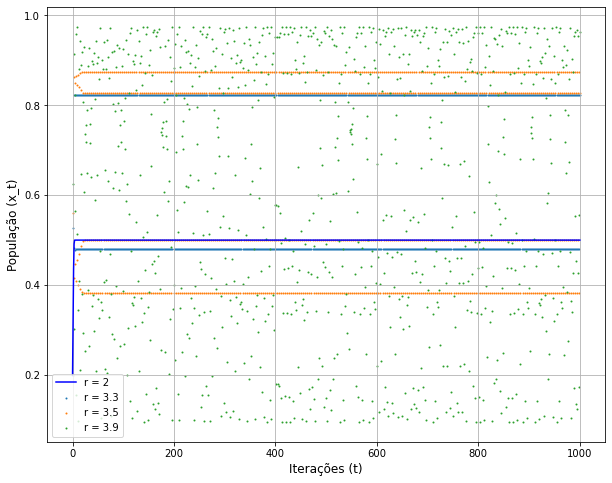

In [48]:
# Função mapa_logistico que implementa a equação logística
def mapa_logistico(r, x0, N):
    x_values = [x0]
    for t in range(1, N + 1):
        x_t = r * x_values[t - 1] * (1 - x_values[t - 1])
        x_values.append(x_t)
    return x_values

# Parâmetros
r_values = [2, 3.3, 3.5, 3.9]  # Valores de r
x0 = 0.2  # Condição inicial
N = 1000  # Número de iterações

# Plotando os gráficos
plt.figure(figsize=(10, 8))

# Gráfico para r = 2 (usando linha)
x_values_r2 = mapa_logistico(2, x0, N)
plt.plot(x_values_r2, label="r = 2", color='blue')

# Gráficos para r = 3.3, 3.5, 3.9 (usando pontos)
for r in r_values[1:]:
    x_values = mapa_logistico(r, x0, N)
    plt.scatter(range(N+1), x_values, label=f"r = {r}", s=1)  # 's=1' define o tamanho dos pontos

# Títulos e rótulos
#plt.title('Comportamento da População em função do tempo (Mapa Logístico)', fontsize=14)
plt.xlabel('Iterações (t)', fontsize=12)
plt.ylabel('População (x_t)', fontsize=12)
plt.legend()
plt.grid(True)

# Exibindo o gráfico
plt.show()

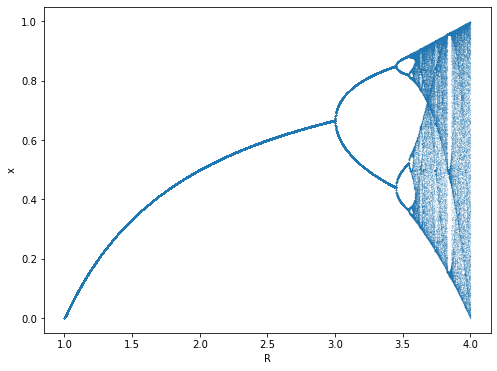

In [16]:
R_list = np.linspace(1, 4, 2000)
transient = 1000
maxiter = 200
nponto = 0 # contador que é incrementado sempre que salvamos um novo ponto

# criamos dois arrays que salvarão os resultados obtidos
eixo_horizontal = np.zeros(len(R_list)*maxiter)
eixo_vertical = np.zeros(len(R_list)*maxiter)

for R in R_list:
    x0 = 0.2 # começamos sempre com x0=0.2

    # pulando o tempo de transiente
    for iter in range(transient):
        x0 = mapa(x0, R)

    # após pular o transiente, salvamos os pontos nos dois arrays
    # chamados eixo_horizontal e eixo_vertical
    for iter in range(maxiter):
        x0 = mapa(x0, R)

        eixo_horizontal[nponto] = R
        eixo_vertical[nponto] = x0
        nponto += 1


plt.figure(figsize=(8, 6))
plt.xlabel('R')
plt.ylabel('x')
plt.plot(eixo_horizontal, eixo_vertical, 'o', markersize=0.06)
plt.show()